# Deer Diffusion

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

<IPython.core.display.Javascript object>


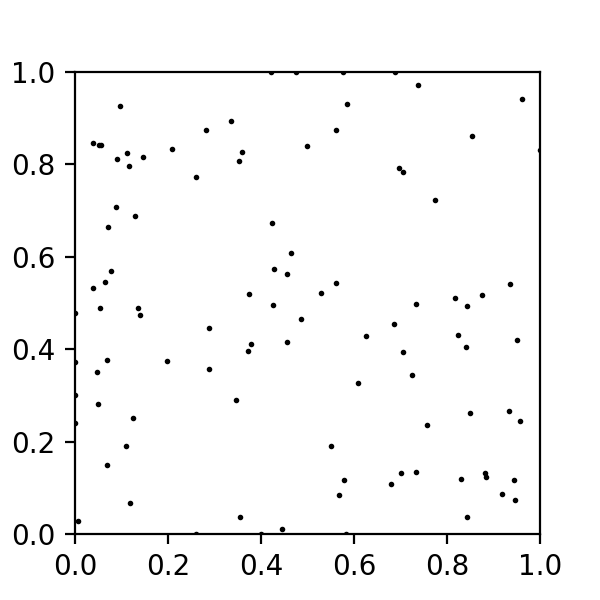

In [3]:
#SLOWER CODE

%matplotlib notebook

nanimals = 100
nsteps = 1000
diffusion_speed = 0.05 #Something speed-like

x = np.ones(nanimals) * 0.5
y = np.ones(nanimals) * 0.5

#Figure
fig=plt.figure(figsize=(3,3));

for t in range(nsteps):
    x+=np.random.randn(nanimals)*diffusion_speed
    y+=np.random.randn(nanimals)*diffusion_speed
    
    for i in range(nanimals):
        if x[i]<0: 
            x[i]=0    
        if y[i]<0: 
            y[i]=0            
        if x[i]>1: 
            x[i]=1    
        if y[i]>1: 
            y[i]=1
            
    plt.cla()
    plt.plot(x,y,'k.',markersize=2);
    plt.xlim((0,1));
    plt.ylim((0,1));
    fig.canvas.draw() #Main command to make the graph move
    time.sleep(0.01)
    


# Better Ways to Limit Values in a Numpy Vector

* The power of numpy is that if we can create a one-liner, it will be really fast, so we should try to avoid for loops if possible 
* For a playground situation, let's create a numpy array with only one negative number, and then let's find a way to set this element to 0. So like limiting from below in our geese-meese situation. 

In [38]:
#PLAYGROUND FOR CHANGING STUFF IN A VECTOR
a = np.array([1,2,3,-7,4]) #Our task: Let's make this -7 a 0 (limiting it)

#Option 1: For loop (slow)
a = np.array([1,2,3,-7,4])
for i in range(len(a)):
    if a[i]<0: a[i]=0
print(a)

#Option 2: Boolean indexing (fast)
a = np.array([1,2,3,-7,4])
print('a[a<0]', a<0)
print('a[a<0]',a[a<0]) #Logical indexing 
a[a<0] = 0 #Only set values for those elements where the condition is true 
print(a)

#Option 2.1
a = np.where(a>0,a,0)
print(a)

#Option 3: Vectorized formula (fast)
a = np.array([1,2,3,-7,4])
#np.sqrt(a) Can do this but will run into problems with -7
a = np.maximum(a,0) #np.max calculates the max of all elements, np.maximum applies max to each element 
print(a)


[1 2 3 0 4]
a[a<0] [False False False  True False]
a[a<0] [-7]
[1 2 3 0 4]
[1 2 3 0 4]
[1 2 3 0 4]


<IPython.core.display.Javascript object>


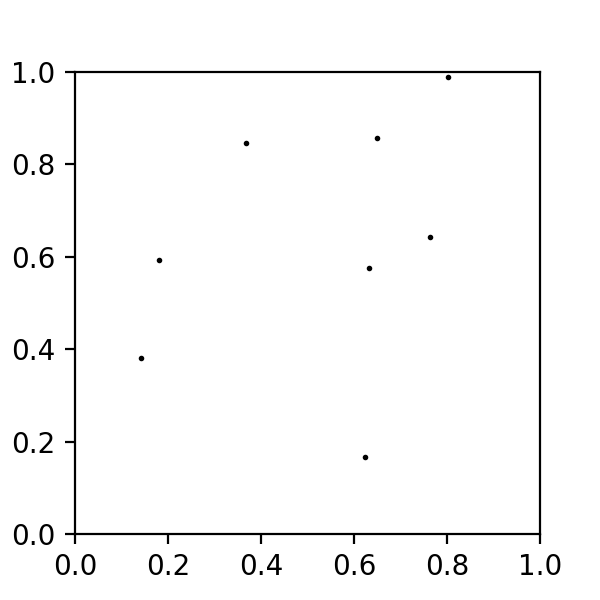

In [37]:
#UPDATED WITH FASTER CODE

%matplotlib notebook

nanimals = 100
nsteps = 1000
diffusion_speed = 0.05 #Something speed-like

x = np.ones(nanimals) * 0.5
y = np.ones(nanimals) * 0.5

#Figure
fig=plt.figure(figsize=(3,3));

for t in range(nsteps):
    x+=np.random.randn(nanimals)*diffusion_speed
    y+=np.random.randn(nanimals)*diffusion_speed
    plt.cla()
    plt.plot(x,y,'k.',markersize=2);
    plt.xlim((0,1));
    plt.ylim((0,1));
    fig.canvas.draw() #Main command to make the graph move
    time.sleep(0.01)

x = np.maximum(x,1)
x = np.minimum(x,0)
y = np.maximum(y,1)
y = np.minimum(y,0)
    
